# SMAI Assignment - 2

## Question - `4` : Gaussian Naïve Bayes

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

This question will have you working and experimenting with the Gaussian Naïve Bayes classifier. Initially, you will calculate the priors and the parameters for the Gaussians. Then, you will use the likelihoods to classify the test data. Please note that use of `sklearn` implementations is only for the final question in the Experiments section.

The dataset is simple and interesting, the [Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). An office has seven Wi-Fi routers and its signal strengths received from these routers categorize the location of the receiver (in one of four rooms). There are 7 attributes and a class label column that can take 4 values. The data is present in `wifiLocalization.txt`. It contains 2000 samples.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# additional imports if necessary

### Estimate Gaussian parameters

Write a function to estimate the parameters of the Gaussian distribution.

In [2]:
def estimate_params(X, y):
    num_classes = np.unique(y).size
    num_features = X.shape[1]
    mu = np.zeros((num_classes, num_features)) #mean
    sigma = np.zeros((num_classes, num_features)) #std
    for i in range(num_classes):
        mu[i] = np.mean(X[y == i], axis=0)
        sigma[i] = np.std(X[y == i], axis=0)
    return mu, sigma

### Calculate priors

Write a function to calculate the priors for each class.

In [3]:
def calculate_priors(y):
    num_samples = y.size
    num_classes = np.unique(y).size
    priors = np.zeros((num_classes,))
    
    for c in range(num_classes):
        priors[c] = np.sum(y == c) / num_samples
    
    return priors

### Likelihood + Classification

Given a test sample, write a function to get the likelihoods for each class in the sample. Use the Gaussian parameters and priors calculated above. Then compute the likelihood that the sample belongs to each class and return the class with the highest likelihood.

What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)

In [4]:
def predict(X_test, mu, sigma, priors):
    num_test_samples = X_test.shape[0]
    num_classes = mu.shape[0]
    likelihoods = np.zeros((num_test_samples, num_classes))
    
    for c in range(num_classes):
        # Calculating the likelihood for each test sample for this class
        likelihoods[:, c] = np.prod(1/(sigma[c]*np.sqrt(2*np.pi)) * np.exp(-(X_test-mu[c])**2/(2*sigma[c]**2)), axis=1)
    
    # Multiplying class priors
    posteriors = likelihoods * priors
    
    # Class with the highest posterior probability for each test sample
    return np.argmax(posteriors, axis=1)

**Fix:** Assuming that the variances of each characteristic for each class are identical while using fixed likelihoods. Since we can estimate a single variance for each feature for all classes rather than estimating a separate variance for each feature for each class, this assumption, also known as homoscedasticity, makes the calculations easier. In actuality, this assumption might not always be valid, and if it is, employing fixed likelihoods can result in less accurate predictions.

**Issues With Likelihoods:**

The likelihoods frequently suffer from the issue of becoming very small, especially when there are a lot of attributes. Numerical underflow can emerge from this when the likelihoods are too small to be adequately stored in a computer's memory. Because of this, the sum of these tiny values may result in a total likelihood of 0, which can interfere with classification.

In [5]:
def predict_fixed(X_test, mu, sigma, priors):
    num_test_samples = X_test.shape[0]
    num_classes = mu.shape[0]
    pooled_sigma = np.mean(sigma, axis=0)  # pooled variance across all classes
    likelihoods = np.zeros((num_test_samples, num_classes))

    for c in range(num_classes):
        # Calculating the likelihood for each test sample for this class
        likelihoods[:, c] = np.prod(1/(pooled_sigma*np.sqrt(2*np.pi)) * np.exp(-(X_test-mu[c])**2/(2*pooled_sigma**2)), axis=1)

    # Multiplying class priors
    posteriors = likelihoods * priors

    # Class with the highest posterior probability for each test sample
    return np.argmax(posteriors, axis=1)


### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [6]:
data = pd.read_csv('wifiLocalization.txt', sep='\t')
data.describe()

,ws1,ws2,ws3,ws4,ws5,ws6,ws7,r
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


In [7]:
data.head()

,ws1,ws2,ws3,ws4,ws5,ws6,ws7,r
0,-47,-53,-54,-49,-63,-88,-85,3
1,-50,-57,-60,-43,-66,-77,-82,3
2,-44,-50,-57,-45,-61,-72,-67,2
3,-48,-59,-53,-45,-74,-81,-81,3
4,-60,-54,-59,-65,-66,-83,-84,1


### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (1600, 7)
Testing data shape: (400, 7)


In [9]:
X_train.head()

,ws1,ws2,ws3,ws4,ws5,ws6,ws7
968,-52,-55,-51,-49,-64,-87,-84
240,-63,-56,-52,-65,-47,-82,-92
819,-63,-57,-64,-69,-75,-85,-83
692,-61,-56,-47,-60,-48,-83,-87
420,-61,-58,-57,-66,-49,-93,-86


In [10]:
y_train = np.array(y_train) - 1
y_test = np.array(y_test) - 1

### Experiments

1. Estimate your model on the training data.
2. Plot the Gaussian probability density functions for each class after estimation.
3. Classify the test data using your model.
4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?
5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?
6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?
7. Compare your results with the `scikit-learn` implementation. You can use the `GaussianNB` class from `sklearn.naive_bayes`. You can use the `score` function to get the accuracy of the model on the test set.
8. (Optional) Try other Naïve Bayes classifiers from [`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) and compare the results.

1. Estimating our model on the training data.

In [11]:
mu, sigma = estimate_params(X_train, y_train)
priors = calculate_priors(y_train)

print("mu: ", mu)
print("sigma: ", sigma)
print("priors: ", priors)

mu:  [[-62.5325     -56.2925     -60.5725     -64.2825     -70.285
  -83.01       -84.1       ]
 [-37.03562341 -56.08142494 -55.98982188 -37.88295165 -67.75318066
  -72.55979644 -73.41221374]
 [-49.61557178 -54.90997567 -52.85888078 -50.82238443 -63.0973236
  -81.34306569 -82.61313869]
 [-60.31313131 -55.25252525 -50.77272727 -61.4040404  -49.5
  -87.11616162 -87.        ]]
sigma:  [[3.22318844 3.28891224 3.7662639  3.64865643 4.56001919 3.67762151
  3.9868534 ]
 [8.7811244  3.35112089 4.23962865 8.24445465 5.40310403 4.6393726
  4.83920098]
 [2.8263878  3.73504124 3.16681972 3.63412927 3.609971   3.63097908
  4.29209908]
 [3.12337704 3.32527339 4.1644071  4.03874966 3.62893813 3.43138241
  3.58588704]]
priors:  [0.25     0.245625 0.256875 0.2475  ]


2. Plotting the Gaussian probability density functions for each class after estimation

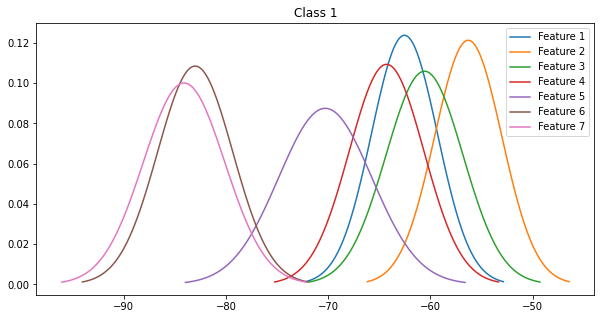

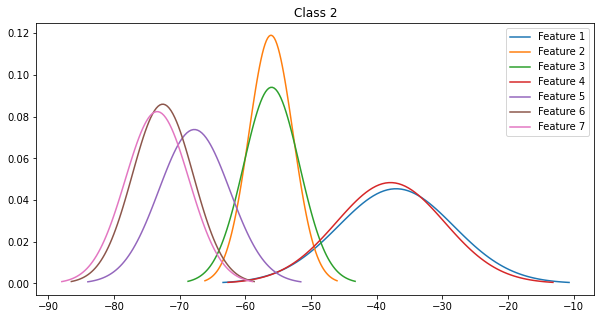

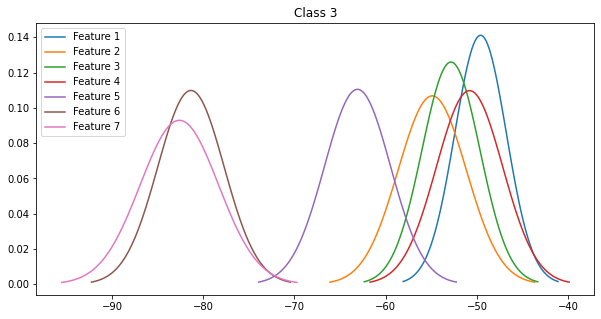

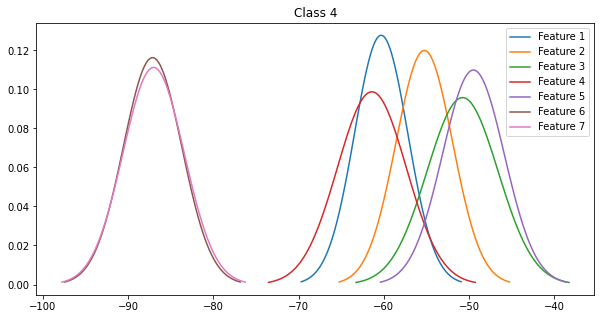

In [12]:
for i in range(len(priors)):
    plt.figure(figsize=(10,5))
    plt.title("Class {}".format(i+1))
    for j in range(len(mu[i])):
        x = np.linspace(mu[i][j]-3*sigma[i][j], mu[i][j]+3*sigma[i][j], 100)
        plt.plot(x, 1/(np.sqrt(2*np.pi)*sigma[i][j])*np.exp(-0.5*((x-mu[i][j])/sigma[i][j])**2), label="Feature {}".format(j+1))
    plt.legend()
    plt.show()

3. Classifing the test data using our model

In [13]:
y_pred = predict(X_test, mu, sigma, priors)

#Calculating accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9825


In [14]:
#Prediction using fixed likelihoods
y_pred_fixed = predict_fixed(X_test, mu, sigma, priors)

#Calculating accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred_fixed))

Accuracy:  0.9775


4. Picking a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?

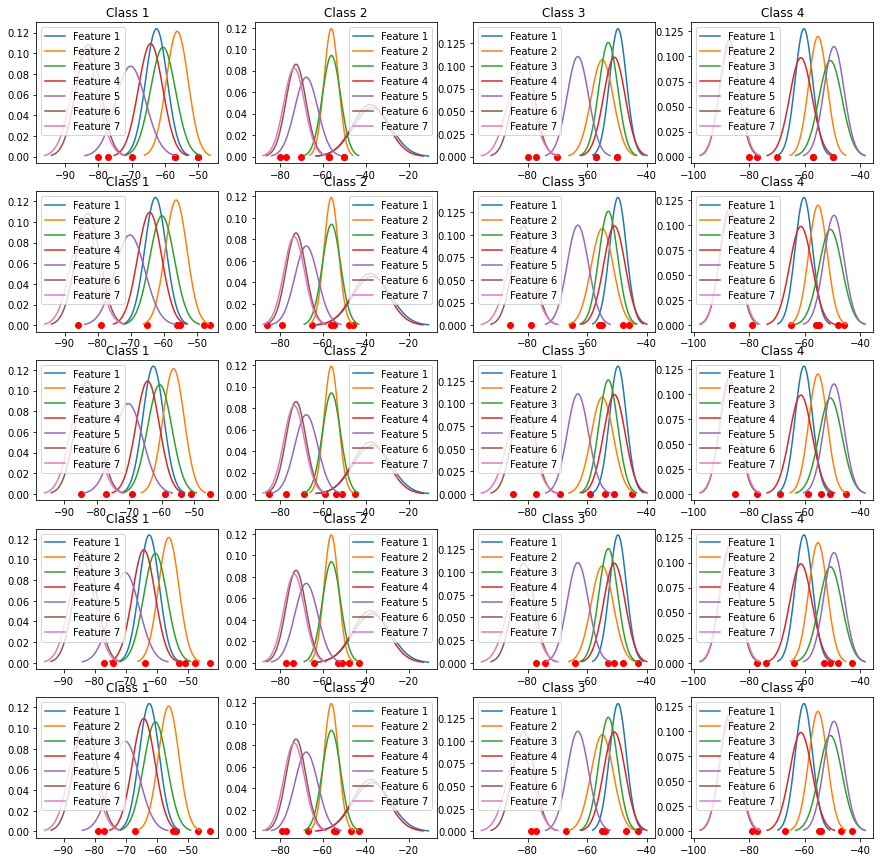

In [15]:
misclassified_idx = np.where(y_pred != y_test)[0]
num_plots = 5
num_classes = mu.shape[0]
num_features = mu.shape[1]
fig, ax = plt.subplots(num_plots, num_classes, figsize=(15, 15))
for i in range(num_plots):
    for c in range(num_classes):
        for j in range(num_features):
            x = np.linspace(mu[c][j]-3*sigma[c][j], mu[c][j]+3*sigma[c][j], 100)
            ax[i][c].plot(x, 1/(np.sqrt(2*np.pi)*sigma[c][j])*np.exp(-0.5*((x-mu[c][j])/sigma[c][j])**2), label="Feature {}".format(j+1))
        ax[i][c].set_title("Class {}".format(c+1))
        ax[i][c].scatter(X_test.iloc[misclassified_idx[i],:], np.zeros(num_features), color="red")
        ax[i][c].legend()
plt.show()

5. Finding if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?

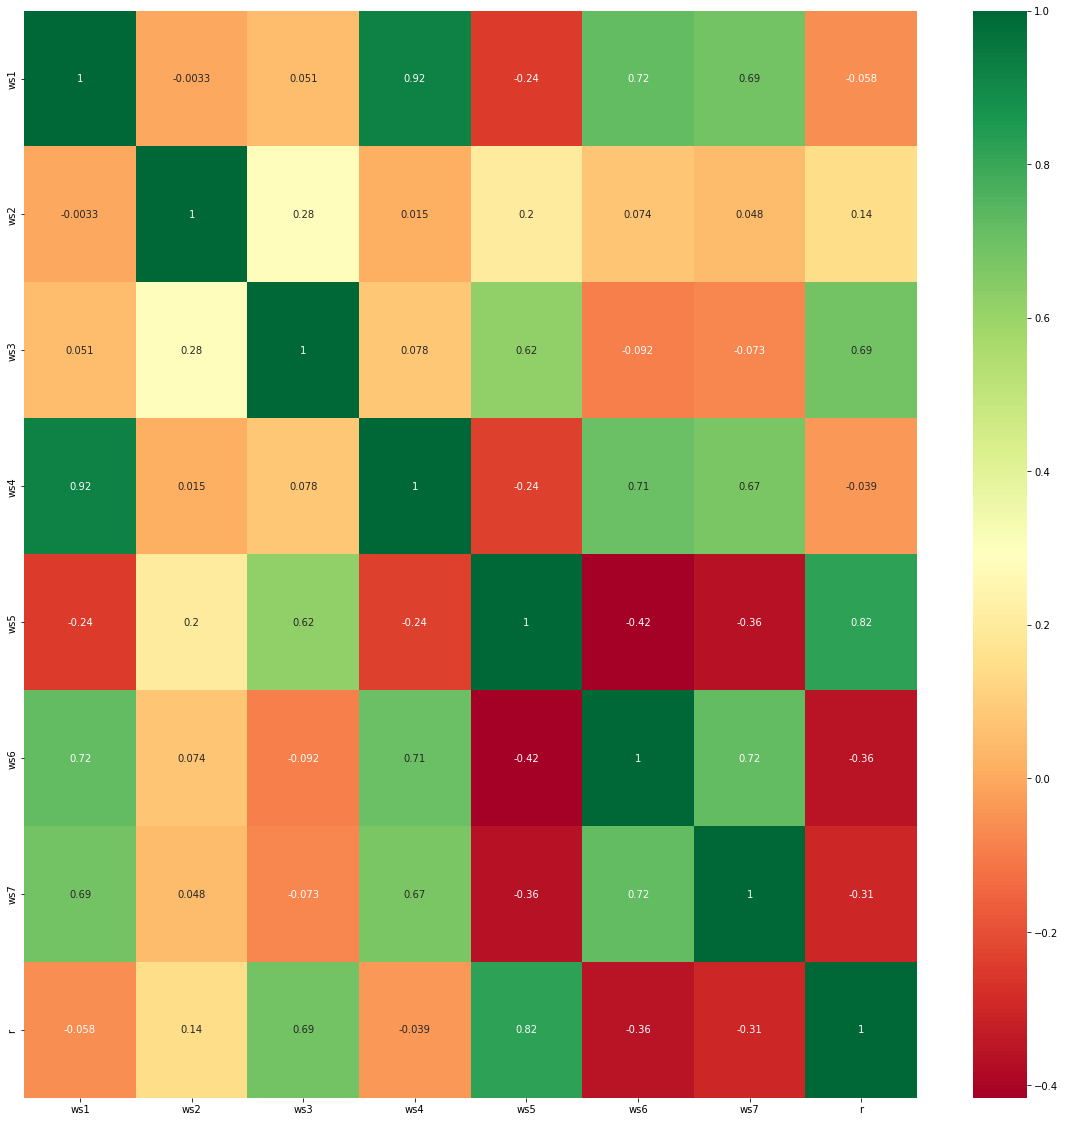

In [16]:
#plotting correlations to check which features are highly related
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="RdYlGn")
plt.show()

In [17]:
## We drop the 4th column (ws4) since its highly correlated with 1st column (ws1)
data_again = pd.read_csv('wifiLocalization.txt', sep='\t')
data_red = data_again.drop(columns=["ws4"])
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(data_red.iloc[:,:-1], data_red.iloc[:,-1], test_size=0.2, random_state=42)
y_train_red = np.array(y_train_red) - 1
y_test_red = np.array(y_test_red) - 1
print("Training data shape:", X_train_red.shape)
print("Testing data shape:", X_test_red.shape)
mu_red, sigma_red = estimate_params(X_train_red, y_train_red)
priors_red = calculate_priors(y_train_red)

#classifying the test data
y_pred_red = predict(X_test_red, mu_red, sigma_red, priors_red)

#calculating the accuracy
print("Accuracy: ", accuracy_score(y_test_red, y_pred_red))


Training data shape: (1600, 6)
Testing data shape: (400, 6)
Accuracy:  0.9825


The accuracy remains the same. Thus, the feature named `ws4` does not help in improving the accuracy and we can get rid of it. 

6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?

In [18]:
"""
mutual information between each feature and the target variable. 
The mutual information measures the amount of information that a feature provides about the target variable. 
We can use the mutual_info_classif function from scikit-learn to compute the mutual information 
between each feature and the target variable.
"""
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X_train, y_train)
for i, score in enumerate(mi_scores):
    print(f"Feature {i+1}: {score:.3f}")

Feature 1: 0.947
Feature 2: 0.028
Feature 3: 0.390
Feature 4: 0.850
Feature 5: 0.677
Feature 6: 0.519
Feature 7: 0.455


In [19]:
#We select the top k features with the highest scores and train the model using only those features.
#We can then evaluate the performance of the model on the test set.

from sklearn.feature_selection import SelectKBest

# Selecting the top k features with the highest mutual information scores
k = 5
selector = SelectKBest(mutual_info_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Training the model using only the selected features
mu_selected, sigma_selected = estimate_params(X_train_selected, y_train)
priors_selected = calculate_priors(y_train)
y_pred_selected = predict(X_test_selected, mu_selected, sigma_selected, priors_selected)

# Evaluating the performance of the model on the test set
print("Accuracy with selected features:", accuracy_score(y_test, y_pred_selected))


Accuracy with selected features: 0.985


When we select only the top 5 features, we notice an increase in the accuracy by `0.25%`

7. Compare your results with the scikit-learn implementation. You can use the GaussianNB class from sklearn.naive_bayes. You can use the score function to get the accuracy of the model on the test set.

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_sklearn = gnb.predict(X_test)

print("Accuracy using sklearn implementation: ", accuracy_score(y_test, y_pred_sklearn))

Accuracy using sklearn implementation:  0.9825


Our model and the `sklearn model` give the same accuracy.